This notebook demonstrates the full optimization process for the two wedges and phase rotation in the middle, along with summarized findings about the various parameters

Updated: 7/14/2023

# Setup

In [1]:
from g4beam import *
from scan import *

import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
import numpy as np
import pandas as pd
from tqdm import *
import pickle
import itertools
from tabulate import tabulate

# Initial distribution

The parameters of the initial beam are treated as constants, but some things are known about their effects:
- **Transverse emittance**: Should be as low as possible. For this test we use an "optimistic" value of 110 microns.
- **Momentum**: Decreasing this appears to slightly decreases x-emittance.
- **Beta**: Decreasing this decreases the y-emittance growth. There may also be an optimal value for x-emittance.
- **Alpha**: Increasing this decreases the y-emittance growth, but past a certain point increases the x-emittance. I believe 0.7 focuses the beam onto the wedge center with a VD distance of 24 mm.
- **Longitudinal emittance**: Effects not yet tested.
- **Standard deviation of momentum**: Decreasing this decreases the x-emittance.
- **Virtual detector distance**: Almost irrelevant. Should be more than 3x the length of the wedge to ensure accurate measurements.

In [2]:
t_emit = 0.110  # mm
momentum = 100  # MeV/c
beta = 0.03    # m
alpha = 1.0     # dimensionless
l_emit = 1      # mm
pz_std = 0.8    # MeV/c
vd_dist = 24    # mm

pre_w1 = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit, N=12000)
pre_w1["PDGid"] = -13
print_all_params(pre_w1)

-----------------------------
Twiss parameters for X
emit  = 0.10979573210984434 mm
beta  = 0.030482642226926905 m
gamma = 66.65936449134982 1/m
alpha = 1.015851149954624
D     = -0.0008606740569285845 m
D'    = 0.0017257962111498172

Twiss parameters for Y
emit  = 0.1099044395747662 mm
beta  = 0.03014275763319482 m
gamma = 66.52055081079531 1/m
alpha = 1.0025531610425575
D     = -0.0010877726709700242 m
D'    = 0.058768380428734994

Z-emittance:  1.4011917969065621 mm
Z std: 191.03871943967246 mm
p std: 0.7971831200388058 MeV/c
Mean momentum: 99.98782679873278 MeV/c
-----------------------------


# First wedge

Determines the optimal length and angle for the first wedge

In [29]:
# Function to optimize
def func(x):
    length, angle = x
    return emittances(cut_outliers(run_distribution(pre_w1, length, angle, vd_dist, axis=0)))[0]

start = time.time()
# Run optimization
optim_result = minimize(func, [7.5, 45], method="Nelder-Mead", bounds=((1, 10), (30, 70)), options=dict(fatol=1e-6))

# Get results
w1_length, w1_angle = optim_result.x
print(f"Length = {w1_length:.2f} mm\nAngle = {w1_angle:.1f} deg")
print("Time spent:", time.time()-start)

# Runs a single case with the optimal parameters
post_w1 = run_distribution(pre_w1, w1_length, w1_angle, vd_dist, axis=0)
print_all_params(post_w1)
print_all_params(cut_outliers(post_w1))

iter value
  35 3.14893e-02
Length = 6.59 mm
Angle = 51.6 deg
Time spent: 484.6891360282898
-----------------------------
Twiss parameters for X
emit  = 0.03266252249531889 mm
beta  = 0.04462293456894974 m
gamma = 261.37848319651465 1/m
alpha = -3.26549765784779
D     = 0.016015835543818125 m
D'    = -0.17114966801600653

Twiss parameters for Y
emit  = 0.11499500597098988 mm
beta  = 0.022617798281796657 m
gamma = 76.42231137880472 1/m
alpha = -0.853524705556001
D     = -0.00012860031580036162 m
D'    = 0.0031408025715954175

Z-emittance:  7.215889211074686 mm
Z std: 180.32954016082152 mm
p std: 6.355374633461807 MeV/c
Mean momentum: 88.79649320589407 MeV/c
-----------------------------
-----------------------------
Twiss parameters for X
emit  = 0.03148928983242929 mm
beta  = 0.04534003808377567 m
gamma = 266.19021327905125 1/m
alpha = -3.3270218525883704
D     = 0.016099912498872163 m
D'    = -0.17778310337015793

Twiss parameters for Y
emit  = 0.11224728870590224 mm
beta  = 0.0223283

In [48]:
post_w1 = run_distribution(pre_w1, w1_length, w1_angle, vd_dist, axis=0)
print_all_params(post_w1)
print_all_params(cut_outliers(post_w1))

-----------------------------
Twiss parameters for X
emit  = 0.03142119281839697 mm
beta  = 0.04990641534545574 m
gamma = 261.15802264405437 1/m
alpha = -3.4689278961765853
D     = 0.016461200673959082 m
D'    = -0.26435550754296544

Twiss parameters for Y
emit  = 0.12744858575905774 mm
beta  = 0.022196140627734316 m
gamma = 66.7036223773988 1/m
alpha = -0.6932265017063536
D     = -8.062849835683117e-05 m
D'    = 0.007306529075906538

Z-emittance:  5.723828063033381 mm
Z std: 142.787554705198 mm
p std: 6.564891870963892 MeV/c
Mean momentum: 88.43903955354267 MeV/c
-----------------------------
-----------------------------
Twiss parameters for X
emit  = 0.030944350398933194 mm
beta  = 0.05051872993641898 m
gamma = 264.7226217117562 1/m
alpha = -3.517591595725265
D     = 0.016574361801152505 m
D'    = -0.26565337407238554

Twiss parameters for Y
emit  = 0.1272842668949593 mm
beta  = 0.022197403179251965 m
gamma = 66.63036433687252 1/m
alpha = -0.6921134741977002
D     = -0.0001303705953

In [21]:
print_all_params(run_distribution(pre_w1, w1_length, w1_angle, vd_dist, axis=0, noWedge=1))

-----------------------------
Twiss parameters for X
emit  = 0.14559073699077354 mm
beta  = 0.022501229381656062 m
gamma = 66.86320540374554 1/m
alpha = -0.710284676719457
D     = 0.00038365588304258876 m
D'    = -0.04007484214911991

Twiss parameters for Y
emit  = 0.1446393396335309 mm
beta  = 0.02238371926778117 m
gamma = 66.88083547433388 1/m
alpha = -0.7050119471697976
D     = -0.0003323009910932513 m
D'    = 0.06171602209176137

Z-emittance:  1.4375373708507695 mm
Z std: 153.81616883576498 mm
p std: 0.9954108161738489 MeV/c
Mean momentum: 100.00306232557438 MeV/c
-----------------------------


# Dispersion correction and transverse separation

We assume that dispersion correction and focusing can be done ideally. We thus remove the dispersion mathematically, propagate the beam in z while leaving x and y positions/momenta untouched, and consider only longitudinal motion in the RF cavity.

For the second wedge, we will re-add the negative of the original Px and Py, to represent refocusing the beam before the second wedge

In [30]:
# Calculate dispersion correction
post_correct = remove_dispersion(post_w1)

# Ignore transverse momentums
no_transverse = remove_transverse(post_correct)

# Reverse transverse momentums in saved copy
reverse_transverse = post_correct.copy(deep=True)
reverse_transverse["Px"] *= -1
reverse_transverse["Py"] *= -1

# Phase rotation

The following are taken as constants, as they are primarily constrained by technical limitations. The optimal RF gradient is heavily dependent on both of these.
- **Drift length**: Longer drift length will give better results
- **RF frequency**: Lower frequency will usually give better results. There's an optimal point, but I believe it's lower than practical

We then optimize the RF phase, cavity length, and gradient

In [31]:
drift_length = 16000
rf_freq = 0.025

start = time.time()
# Function to optimize
def func(x):
    rf_phase, rf_length, rf_grad = x
    drift_to_start = drift_length-rf_length/2
    post_drift = recenter_t(z_prop(no_transverse, drift_to_start))
    post_cavity = run_g4beam(post_drift, "G4_RFCavity.g4bl", RF_length=rf_length, frfcool=rf_freq, ficool=rf_phase, Vrfcool=rf_grad, nparticles=len(no_transverse))
    pre_w2 = recombine_transverse(post_cavity, reverse_transverse)
    return np.std(p_total(cut_pz(pre_w2)))

# Run optimization
optim_result = minimize(func, [0, 4700, 7], method="Nelder-Mead", bounds=((-90, 90), (2000, 6000), (1, 10)), options=dict(fatol=1e-6))

# Get results
rf_phase, rf_length, rf_grad = optim_result.x
print(f"Phase = {rf_phase:.2f} deg\nLength = {rf_length:.0f} mm\nGradient = {rf_grad:.2f} MV/m\nFrequency = {rf_freq*1000:.1f} MHz")
print("Time spent:", time.time()-start)

# Runs a single case with the optimal parameters and add the transverse back in
drift_to_start = drift_length-rf_length/2
post_drift = recenter_t(z_prop(no_transverse, drift_to_start))
post_cavity = cut_pz(recenter_t(run_g4beam(post_drift, "G4_RFCavity.g4bl", RF_length=rf_length, frfcool=rf_freq, ficool=rf_phase, Vrfcool=rf_grad)))
pre_w2 = recombine_transverse(post_cavity, reverse_transverse)
print_all_params(pre_w2)

iter value
  67 1.46317e+00
Phase = 0.00 deg
Length = 5693 mm
Gradient = 5.15 MV/m
Frequency = 25.0 MHz
Time spent: 3357.7522072792053
-----------------------------
Twiss parameters for X
emit  = 0.027870293464897503 mm
beta  = 0.04432631612916882 m
gamma = 289.0435232102367 1/m
alpha = 3.4368931587853724
D     = 0.0005117700214661292 m
D'    = 0.07426729188024808

Twiss parameters for Y
emit  = 0.10617776860974211 mm
beta  = 0.02135641032696126 m
gamma = 78.4786231438916 1/m
alpha = 0.8222053744387148
D     = -0.0004415751512704237 m
D'    = -0.007804529057217447

Z-emittance:  5.013906059579612 mm
Z std: 697.2296592191377 mm
p std: 1.4631657208248188 MeV/c
Mean momentum: 87.78410452869596 MeV/c
-----------------------------


# Second wedge

Optimize the second wedge in the same way as the first

In [32]:
start = time.time()
# Function to optimize
def func(x):
    length, angle = x
    return emittances(cut_outliers(run_distribution(pre_w2, length, angle, vd_dist, axis=1)))[1]

# Run optimization
optim_result = minimize(func, [5.5, 45], method="Nelder-Mead", bounds=((1, 10), (30, 70)), options=dict(fatol=1e-6))

# Get results
w2_length, w2_angle = optim_result.x
print(f"Length = {w2_length:.2f} mm\nAngle = {w2_angle:.1f} deg")
print("Time spent:", time.time()-start)

# Runs a single case with the optimal parameters
post_w2 = run_distribution(pre_w2, w2_length, w2_angle, vd_dist, axis=1)
print_all_params(post_w2)

# Do cuts at this point
post_w2_cut = cut_outliers(post_w2)
print_all_params(post_w2_cut)

beep()

iter value
  43 3.65075e-02
Length = 5.12 mm
Angle = 47.2 deg
Time spent: 552.399266242981
-----------------------------
Twiss parameters for X
emit  = 0.03159738161761453 mm
beta  = 0.05966848822678011 m
gamma = 301.6641241124728 1/m
alpha = -4.123086494126338
D     = 3.3144882662272645e-05 m
D'    = 0.011464158114337406

Twiss parameters for Y
emit  = 0.054273241945906034 mm
beta  = 0.0375528775632876 m
gamma = 175.942550676866 1/m
alpha = -2.3679419468688145
D     = 0.016206376062333296 m
D'    = 0.19055395964883065

Z-emittance:  24.483222160330193 mm
Z std: 640.384123392066 mm
p std: 6.772940723523679 MeV/c
Mean momentum: 76.90368970731777 MeV/c
-----------------------------
-----------------------------
Twiss parameters for X
emit  = 0.029806167656556082 mm
beta  = 0.060724856041955044 m
gamma = 311.7666486848675 1/m
alpha = -4.234617439636236
D     = -1.948656189023859e-06 m
D'    = 0.009637108615137578

Twiss parameters for Y
emit  = 0.03650746845184817 mm
beta  = 0.04697146267

# Save/load result

In [9]:
# Parameter list
PARAMS = [
    "t_emit",
    "momentum",
    "beta",
    "alpha",
    "l_emit",
    "pz_std",
    "vd_dist",
    "w1_length",
    "w1_angle",
    "w2_length",
    "w2_angle",
    "drift_length",
    "rf_freq",
    "rf_phase",
    "rf_length",
    "rf_grad"
]

In [10]:
# Show parameters
{k:globals()[k] for k in PARAMS}

{'t_emit': 0.145,
 'momentum': 100,
 'beta': 0.03,
 'alpha': 0.7,
 'l_emit': 1,
 'pz_std': 1,
 'vd_dist': 24,
 'w1_length': 7.501906369754579,
 'w1_angle': 46.538398375036195,
 'w2_length': 6.06795178364264,
 'w2_angle': 40.7958152059,
 'drift_length': 16000,
 'rf_freq': 0.025,
 'rf_phase': 0.0002612734499101793,
 'rf_length': 5589.183462571583,
 'rf_grad': 5.143547111719555}

In [8]:
# Input parameters
parameters = {'t_emit': 0.145,
 'momentum': 100,
 'beta': 0.03,
 'alpha': 1,
 'l_emit': 1,
 'pz_std': 1,
 'vd_dist': 24,
 'w1_length': 9.20751061747799,
 'w1_angle': 49.78231333988419,
 'w2_length': 6.724887901827298,
 'w2_angle': 42.245718529695516,
 'drift_length': 16000,
 'rf_freq': 0.025,
 'rf_phase': 0.001987066319906211,
 'rf_length': 5153.756925848655,
 'rf_grad': 4.046563465382562}
globals().update(parameters)

In [35]:
# Save parameter set
parameters = {k:globals()[k] for k in PARAMS}
filename = "results/parameters/"+input("Enter run name to save: ")+".pkl"
with open(filename, "wb+") as file:
    pickle.dump(parameters, file)
    print("Saved to", filename)

Enter run name to save:  110_new2


Saved to results/parameters/110_new2.pkl


In [3]:
# Load parameter set
filename = "results/parameters/"+input("Enter run name to load: ")+".pkl"
with open(filename, "rb+") as file:
    parameters = pickle.load(file)
    globals().update(parameters)
    print("Loaded from", filename)

Enter run name to load:  145_new


Loaded from results/parameters/145_new.pkl


In [2]:
# View parameter set
filename = "results/parameters/"+input("Enter run name to view: ")+".pkl"
with open(filename, "rb+") as file:
    parameters = pickle.load(file)
    print("Viewing", filename)
    print(*[x + ":" + str(parameters[x]) for x in parameters], sep="\n")

Enter run name to view:  145_new


Viewing results/parameters/145_new.pkl
t_emit:0.145
momentum:100
beta:0.03
alpha:0.7
l_emit:1
pz_std:1
vd_dist:24
w1_length:7.501906369754579
w1_angle:46.538398375036195
w2_length:6.06795178364264
w2_angle:40.7958152059
drift_length:16000
rf_freq:0.025
rf_phase:0.0002612734499101793
rf_length:5589.183462571583
rf_grad:5.143547111719555


In [255]:
vd_dist=36

# Analyze single case

In [26]:
# Tweak parameters
l_emit = 2
rf_grad = 5.143547

In [5]:
start = time.time()
# Run best case
pre_w1 = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit, N=12000)
pre_w1["PDGid"] = -13
print("Running first wedge")
%time post_w1 = run_distribution(pre_w1, w1_length, w1_angle, vd_dist, axis=0)
print("Results of first wedge")
print_all_params(post_w1)
# post_correct = remove_dispersion(post_w1)
# reverse_transverse = post_correct.copy(deep=True)
# reverse_transverse["Px"] *= -1
# reverse_transverse["Py"] *= -1
# drift_to_start = drift_length-rf_length/2
# post_drift = recenter_t(z_prop(post_correct, drift_to_start))
# no_transverse = remove_transverse(post_drift)
# print("Running RF cavity")
# %time post_cavity = cut_pz(recenter_t(run_g4beam(no_transverse, "G4_RFCavity.g4bl", RF_length=rf_length, frfcool=rf_freq, ficool=rf_phase, Vrfcool=rf_grad, nparticles=len(no_transverse))), tails=0.15)
# pre_w2 = recombine_transverse(post_cavity, reverse_transverse)
# print("Running second wedge")
# %time post_w2 = run_distribution(pre_w2, w2_length, w2_angle, vd_dist, axis=1)
# post_w2_cut = recenter_t(cut_outliers(post_w2))
# print_all_params(post_w2_cut)
# beep()
# print(f"Time elapsed: {time.time() - start:.1f}")

Running first wedge
CPU times: total: 78.1 ms
Wall time: 2.78 s
Results of first wedge
-----------------------------
Twiss parameters for X
emit  = 0.04959062805361045 mm
beta  = 0.03426278133826247 m
gamma = 178.92568575445404 1/m
alpha = -2.2650588616642002
D     = 0.020092510048361257 m
D'    = -0.03617382610629558

Twiss parameters for Y
emit  = 0.15140639781246995 mm
beta  = 0.025333517159892942 m
gamma = 57.71965297480582 1/m
alpha = -0.6798836805662489
D     = 0.00011833023970000667 m
D'    = -0.004336495672029704

Z-emittance:  6.405473422470152 mm
Z std: 143.03333176948232 mm
p std: 7.224415011407342 MeV/c
Mean momentum: 87.2681588071797 MeV/c
-----------------------------


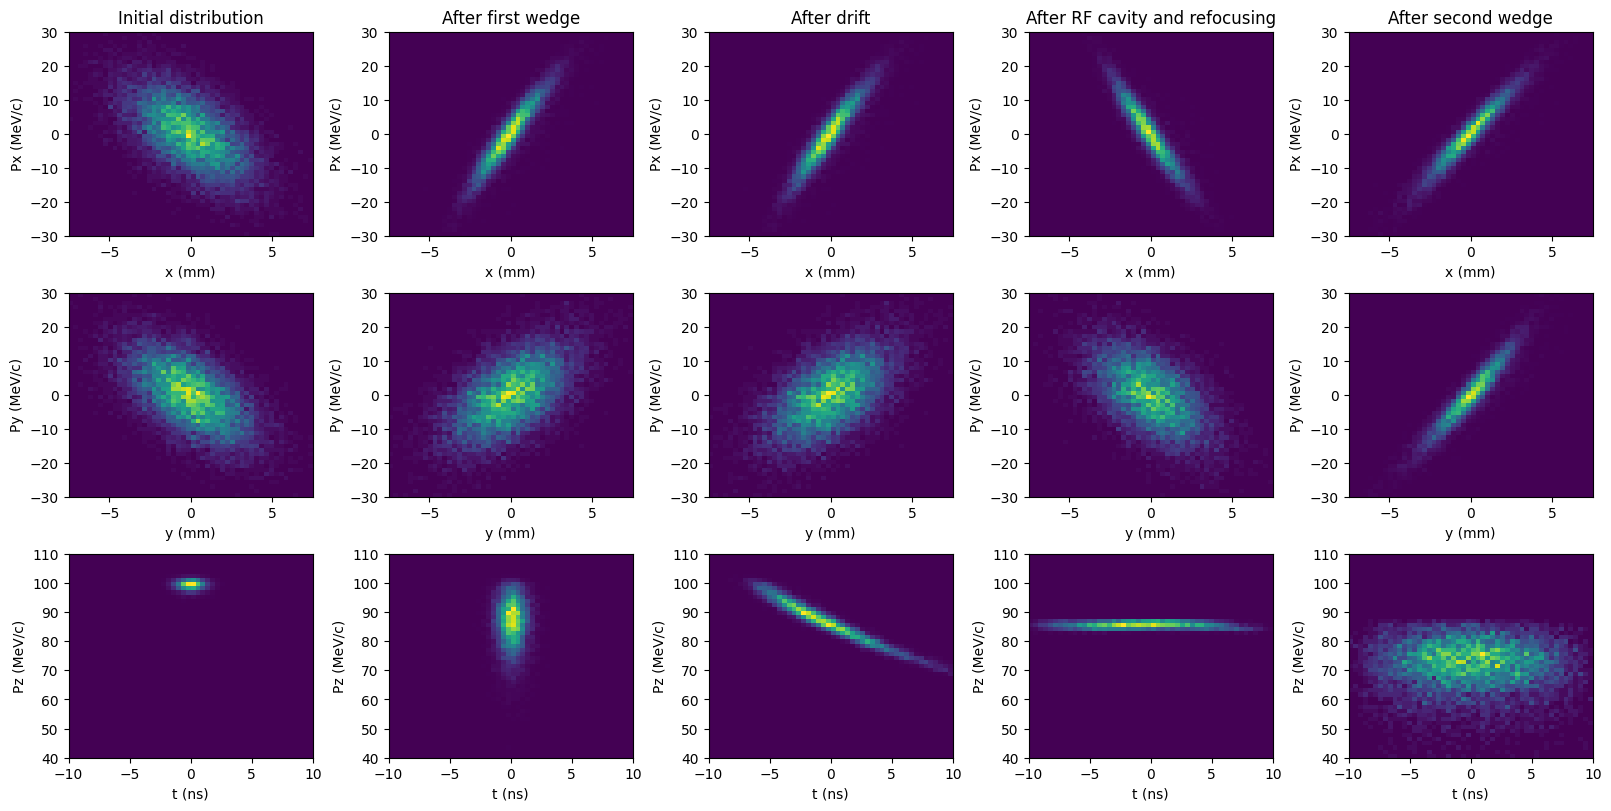

In [6]:
# Make some phase space plots
PLOT_TARGETS = [pre_w1, post_correct, post_drift, pre_w2, remove_dispersion(post_w2_cut)]
PLOT_TITLES = ["Initial distribution", "After first wedge", "After drift", "After RF cavity and refocusing", "After second wedge"]
PLOT_AXES = [("x", "Px"), ("y", "Py"), ("t", "Pz")]
PLOT_LABELS = [("x (mm)", "Px (MeV/c)"), ("y (mm)", "Py (MeV/c)"), ("t (ns)", "Pz (MeV/c)")]
T_RANGES = [[-7.5, 7.5], [-30, 30]]
L_RANGES = [[-10, 10], [40, 110]]

fig, axes = plt.subplots(nrows = len(PLOT_AXES), ncols = len(PLOT_TARGETS), layout="constrained")
fig.set_size_inches(16, 8)
for i, df in enumerate(PLOT_TARGETS):
    axes[0][i].set_title(PLOT_TITLES[i])
    for j, ((xaxis, yaxis), (xlabel, ylabel)) in enumerate(zip(PLOT_AXES, PLOT_LABELS)):
        ax = axes[j][i]
        ax.hist2d(df[xaxis], df[yaxis], bins=50, range=L_RANGES if j == 2 else T_RANGES)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
# fig.suptitle(f"temit={t_emit*1000:.0f} μm, σP={pz_std:.2f} MeV/c")

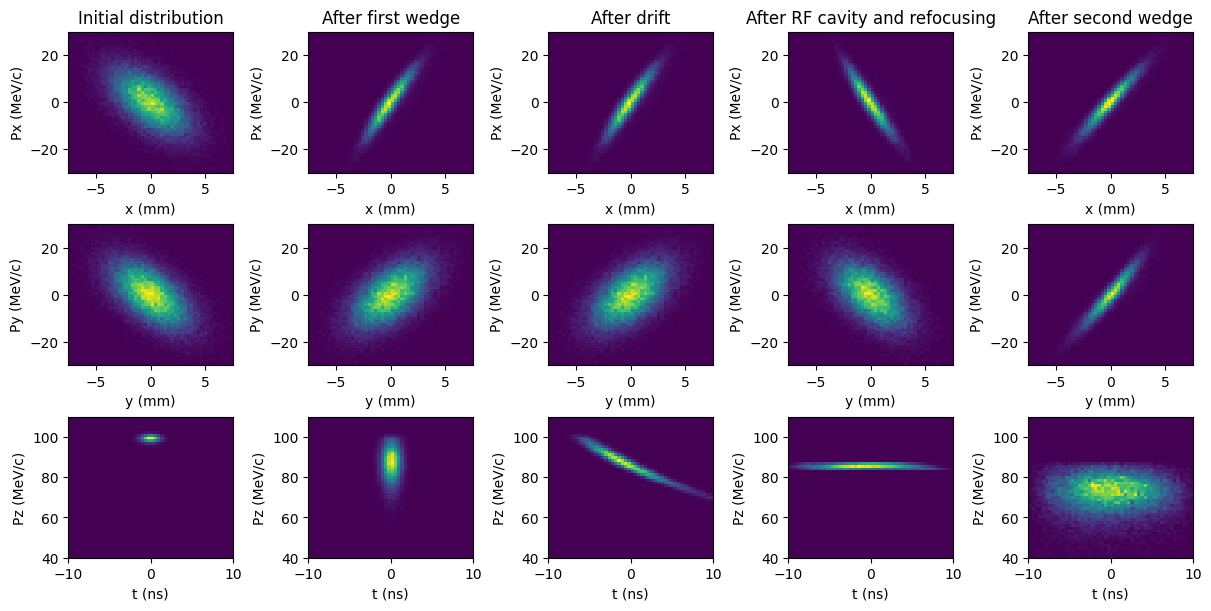

In [9]:
# a more reasonable size
PLOT_TARGETS = [pre_w1, post_correct, post_drift, pre_w2, remove_dispersion(post_w2_cut)]
PLOT_TITLES = ["Initial distribution", "After first wedge", "After drift", "After RF cavity and refocusing", "After second wedge"]
PLOT_AXES = [("x", "Px"), ("y", "Py"), ("t", "Pz")]
PLOT_LABELS = [("x (mm)", "Px (MeV/c)"), ("y (mm)", "Py (MeV/c)"), ("t (ns)", "Pz (MeV/c)")]
T_RANGES = [[-7.5, 7.5], [-30, 30]]
L_RANGES = [[-10, 10], [40, 110]]

fig, axes = plt.subplots(nrows = len(PLOT_AXES), ncols = len(PLOT_TARGETS), layout="constrained")
fig.set_size_inches(12, 6)
for i, df in enumerate(PLOT_TARGETS):
    axes[0][i].set_title(PLOT_TITLES[i])
    for j, ((xaxis, yaxis), (xlabel, ylabel)) in enumerate(zip(PLOT_AXES, PLOT_LABELS)):
        ax = axes[j][i]
        ax.hist2d(df[xaxis], df[yaxis], bins=50, range=L_RANGES if j == 2 else T_RANGES)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)

In [18]:
SAMPLE_DISTS = [pre_w1, post_correct, pre_w2, post_w2, post_w2_cut]
SAMPLE_TITLES = ["Initial distribution", "After first wedge", "After RF cavity + 15% cut", "After second wedge", "After 4 sigma cut"]
VARIABLE_NAMES = ["x emit (μm)", "y emit (μm)", "z-emit (mm)", "sigma-p (MeV/c)", "sigma-t (ns)", "Beam momentum (MeV/c)", "Beam remaining"]
VARIABLE_FUNCS = [
    lambda df: emittances(df)[0]*1000,
    lambda df: emittances(df)[1]*1000,
    lambda df: emittances(df)[2],
    lambda df: np.std(p_total(df)),
    lambda df: np.std(df["t"]),
    lambda df: np.mean(p_total(df)),
    lambda df: len(df) / len(pre_w1)
]
table = [[n] + [y(x) for y in VARIABLE_FUNCS] for n, x in zip(SAMPLE_TITLES, SAMPLE_DISTS)]
print(tabulate(
    table,
    headers=["Stage"] + VARIABLE_NAMES,
    # tablefmt="latex_raw",
    floatfmt=(None, ".1f", ".1f", ".3f", ".3f", ".3f", ".1f", ".1%")
))
print()
print(tabulate(
    table,
    tablefmt="latex_raw",
    floatfmt=(None, ".1f", ".1f", ".3f", ".3f", ".3f", ".1f", ".1%")
))

Stage                        x emit (μm)    y emit (μm)    z-emit (mm)    sigma-p (MeV/c)    sigma-t (ns)    Beam momentum (MeV/c)    Beam remaining
-------------------------  -------------  -------------  -------------  -----------------  --------------  -----------------------  ----------------
Initial distribution               145.6          144.8          1.253              1.004           0.743                    100.0            100.0%
After first wedge                   46.3          151.5          6.321              7.203           0.743                     87.3            100.0%
After RF cavity + 15% cut           38.0          139.6          4.403              1.308           4.048                     86.3             84.0%
After second wedge                  45.2           50.0         29.937              8.069           4.047                     72.7             83.9%
After 4 sigma cut                   40.4           44.0         28.776              7.783           4.045 

### Anomaly investigation

Well, this wasn't my fault

In [42]:
pre_w1_new = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), 90, pz_std, z_emit=l_emit, N=50000)

post_w1_new_1 = run_distribution(pre_w1_new, w1_length, w1_angle, vd_dist, axis=0)
pre_w1_new["PDGid"] = -13
post_w1_new_2 = run_distribution(pre_w1_new, w1_length, w1_angle, vd_dist, axis=0)
beep()

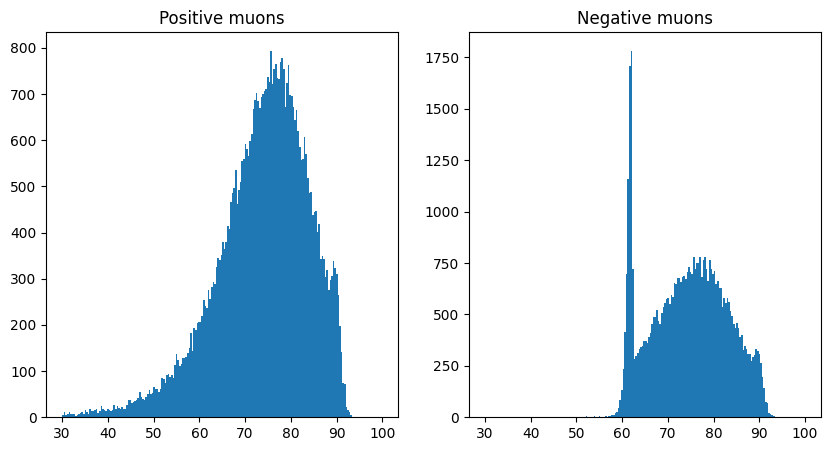

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(10, 5)
ax1.hist(p_total(post_w1_new_2), bins=200, range=(30, 100))
ax1.set_title("Positive muons")
ax2.hist(p_total(post_w1_new_1), bins=200, range=(30, 100))
ax2.set_title("Negative muons")
pass

In [141]:
momentums = list(range(50, 101, 10))
results = list() #  Yeah we're back to the old days now
for momentum in tqdm(momentums):
    pre_w1 = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit, N=12000)
    pre_w1["PDGid"] = -13
    results.append(run_distribution(pre_w1, w1_length, w1_angle, vd_dist, axis=0))
beep()

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:34<00:00,  5.76s/it]


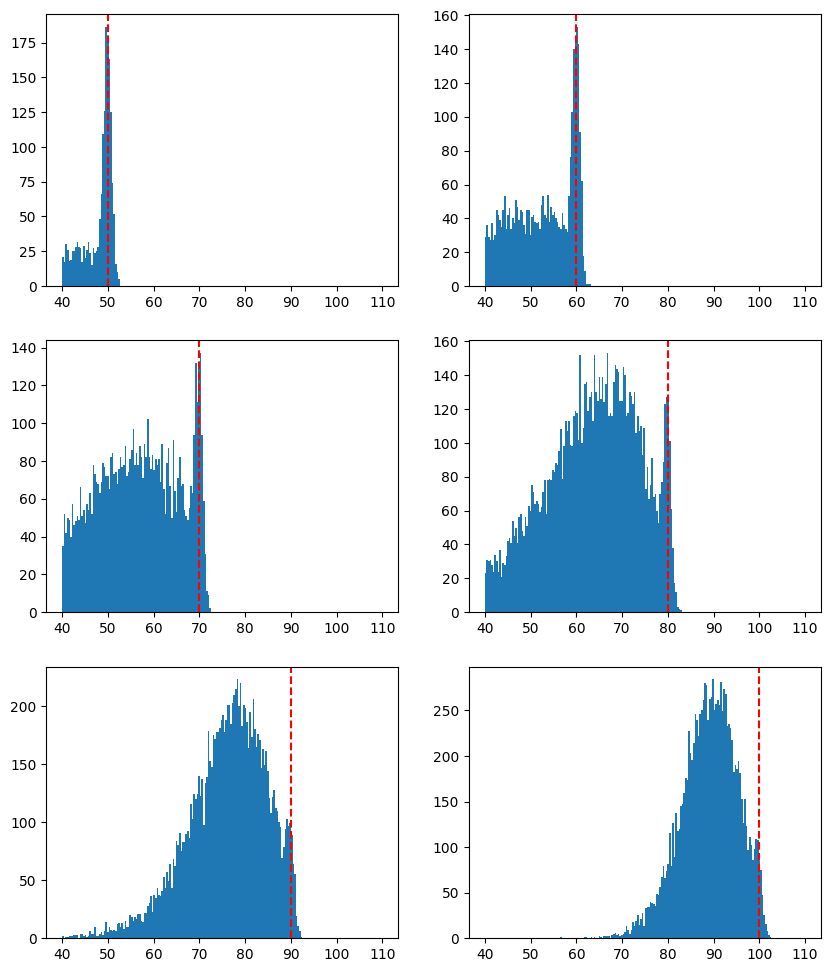

In [142]:
fig, axs = plt.subplots(nrows = 3, ncols = 2)
axs = axs.flatten()
fig.set_size_inches(10, 12)
for momentum, x, ax in zip(momentums, results, axs):
    ax.hist(p_total(x), bins=200, range=(40, 110))
    ax.axvline(momentum, color="red", linestyle="--")
pass

In [140]:
results[0]["PDGid"]

0       13
1       13
2       13
3       13
4       13
        ..
3023    13
3024    13
3025    13
3026    13
3027    13
Name: PDGid, Length: 3028, dtype: int64

In [111]:
angles = [30, 40, 50, 60]
momentum = 70
results1 = list() #  Yeah we're back to the old days now
for angle in tqdm(angles):
    pre_w1 = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit, N=12000)
    results1.append(run_distribution(pre_w1, w1_length, angle, vd_dist, axis=0))
beep()

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:18<00:00,  4.67s/it]


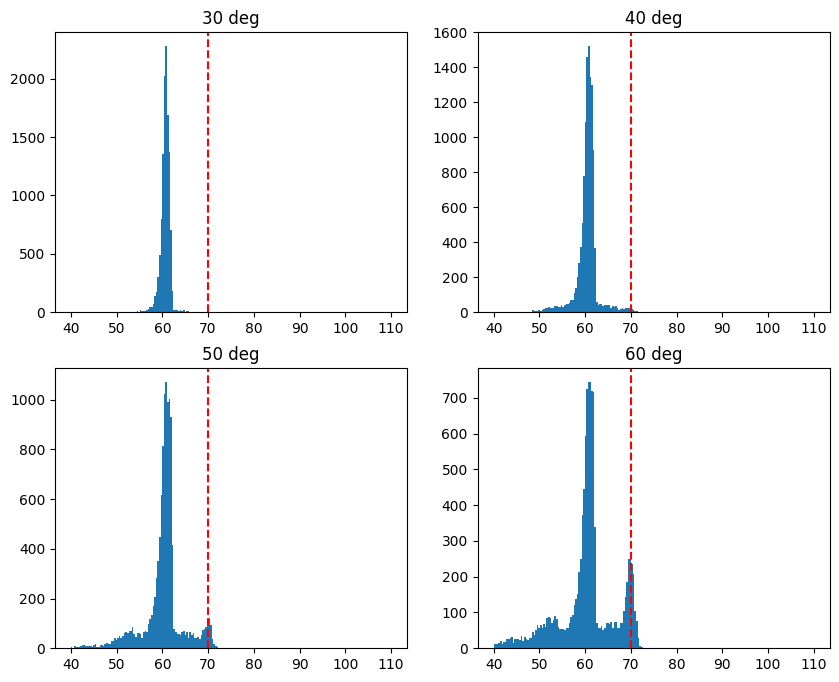

In [112]:
fig, axs = plt.subplots(nrows = 2, ncols = 2)
axs = axs.flatten()
fig.set_size_inches(10, 8)
for angle, x, ax in zip(angles, results1, axs):
    ax.hist(p_total(x), bins=200, range=(40, 110))
    ax.axvline(momentum, color="red", linestyle="--")
    ax.set_title(f"{angle} deg")
pass

In [115]:
lengths = [3, 6, 9, 12]
momentum = 70
results2 = list() #  Yeah we're back to the old days now
for length in tqdm(lengths):
    pre_w1 = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit, N=12000)
    results2.append(run_distribution(pre_w1, length, w1_angle, 40, axis=0))
beep()

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:20<00:00,  5.01s/it]


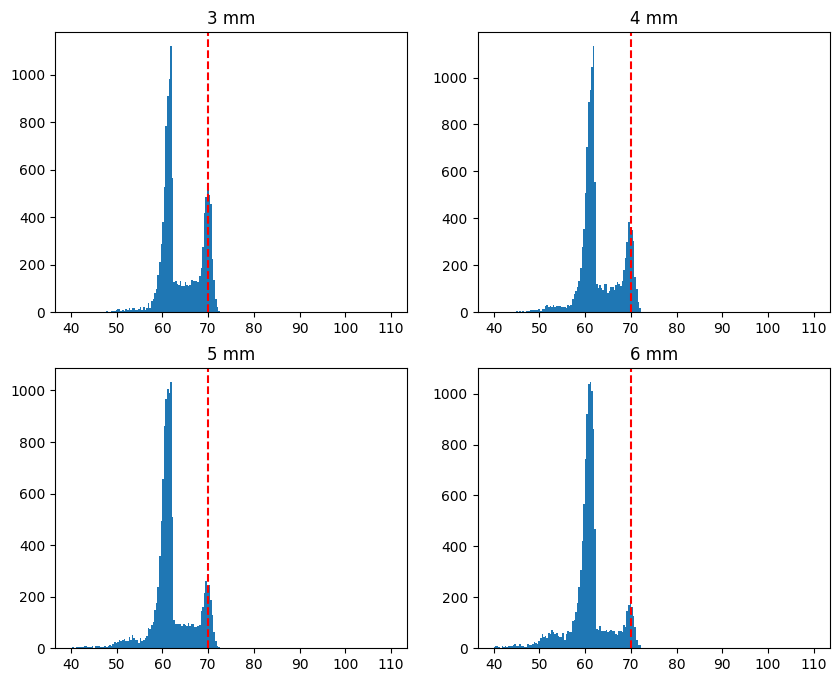

In [114]:
fig, axs = plt.subplots(nrows = 2, ncols = 2)
axs = axs.flatten()
fig.set_size_inches(10, 8)
for length, x, ax in zip(lengths, results2, axs):
    ax.hist(p_total(x), bins=200, range=(40, 110))
    ax.axvline(momentum, color="red", linestyle="--")
    ax.set_title(f"{length} mm")
pass

In [297]:
fig, ax = plt.subplots()
ax.hist(p_total(post_w2_cut), bins=200)
select_bottom, select_top = 60.5, 62.5
ax.axvline(select_bottom, color="r", linestyle="--")
ax.axvline(select_top, color="r", linestyle="--")
anomaly = post_w2_cut[(p_total(post_w2_cut) < select_top) & (p_total(post_w2_cut) > select_bottom)]
pre_anomaly = pre_w2.loc[anomaly["EventID"]]
post_anomaly = run_distribution(pre_anomaly, w2_length, w2_angle, vd_dist, axis=1)

<IPython.core.display.Javascript object>

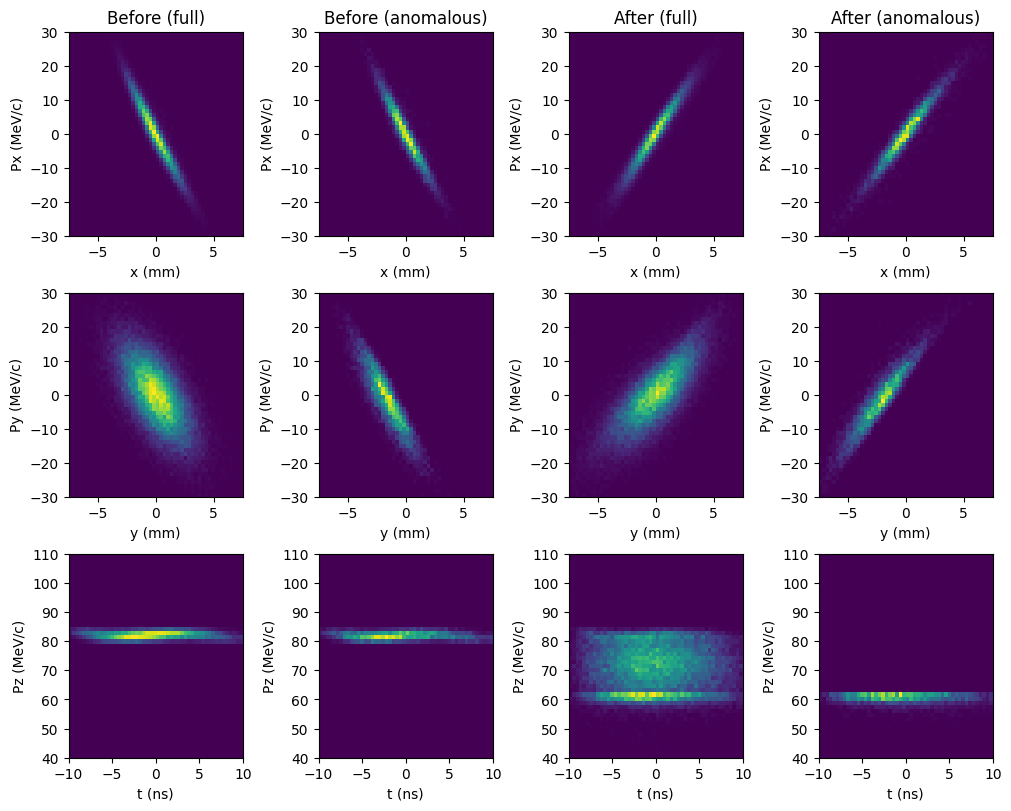

In [254]:
# Show the anomaly
PLOT_TARGETS = [pre_w2, pre_anomaly, post_w2_cut, post_anomaly]
PLOT_TITLES = ["Before (full)", "Before (anomalous)", "After (full)", "After (anomalous)"]
PLOT_AXES = [("x", "Px"), ("y", "Py"), ("t", "Pz")]
PLOT_LABELS = [("x (mm)", "Px (MeV/c)"), ("y (mm)", "Py (MeV/c)"), ("t (ns)", "Pz (MeV/c)")]
T_RANGES = [[-7.5, 7.5], [-30, 30]]
L_RANGES = [[-10, 10], [40, 110]]

fig, axes = plt.subplots(nrows = len(PLOT_AXES), ncols = len(PLOT_TARGETS), layout="constrained")
fig.set_size_inches(10, 8)
for i, df in enumerate(PLOT_TARGETS):
    axes[0][i].set_title(PLOT_TITLES[i])
    for j, ((xaxis, yaxis), (xlabel, ylabel)) in enumerate(zip(PLOT_AXES, PLOT_LABELS)):
        ax = axes[j][i]
        ax.hist2d(df[xaxis], df[yaxis], bins=50, range=L_RANGES if j == 2 else T_RANGES)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
# fig.suptitle(f"temit={t_emit*1000:.0f} μm, σP={pz_std:.2f} MeV/c")

In [294]:
run_distribution(pre_w1, w2_length, w2_angle, vd_dist, axis=1, debug=True)

abshalfangle3=50.149723291397095 absoffset3=2.023531266248378 abshgt=15.123813424798636 absLEN3=36 wedgeAxis=1 nparticles=50000


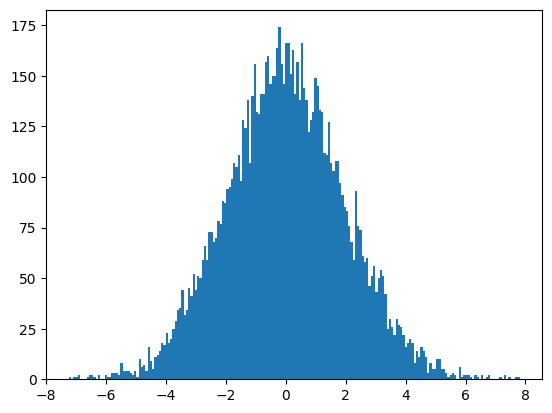

In [128]:
fig, ax = plt.subplots()
ax.hist(post_w2_cut["y"], bins=200)
pass

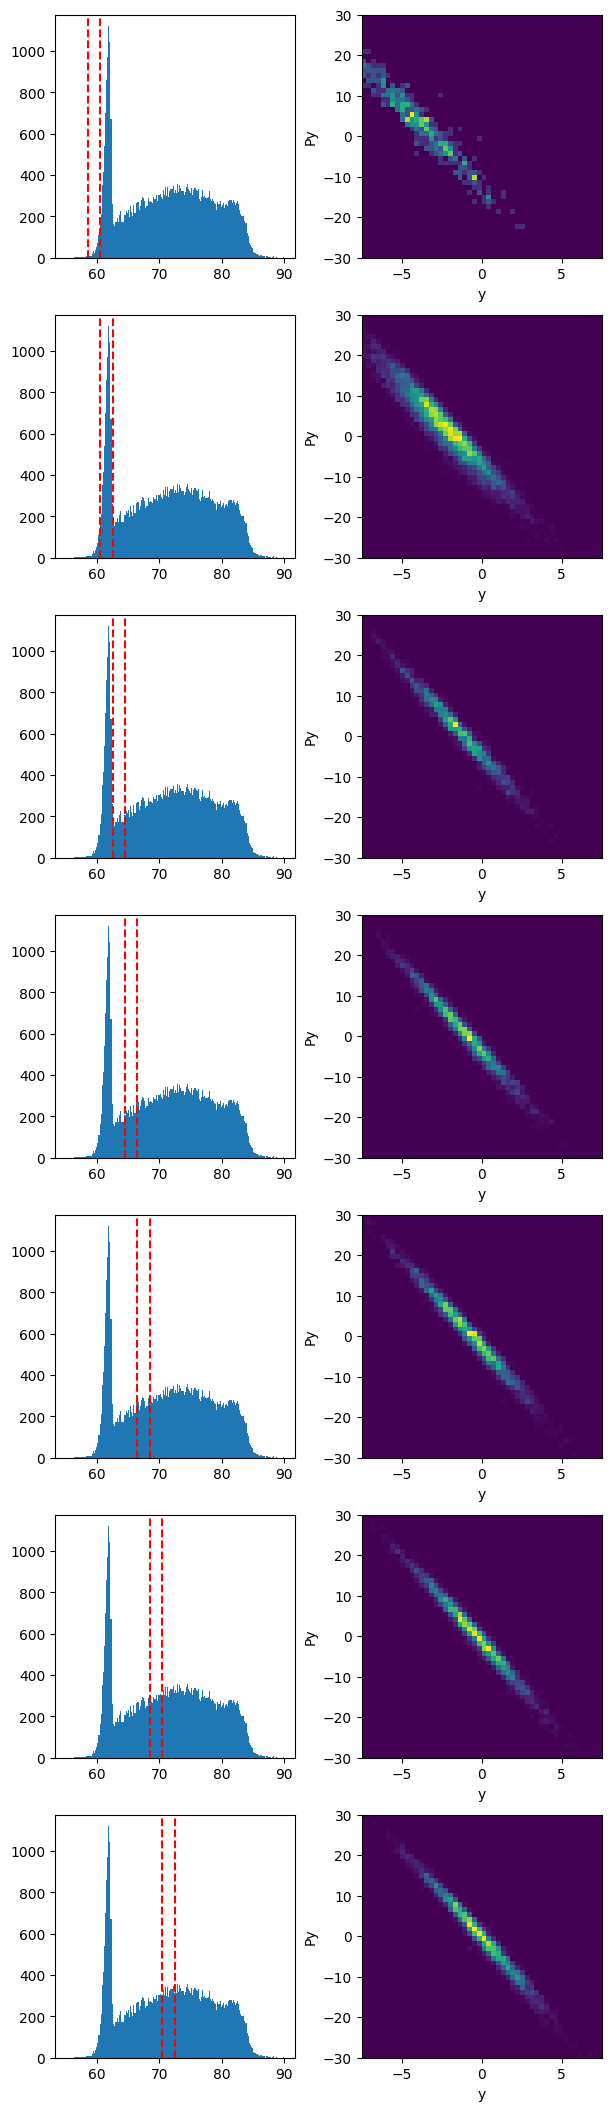

In [281]:
p_ranges = [(58.5+2*i, 60.5+2*i) for i in range(7)]

fig, axes = plt.subplots(ncols = 2, nrows = len(p_ranges), layout="constrained")
fig.set_size_inches(6, 3*len(p_ranges))
for i, r in enumerate(p_ranges):
    ax = axes[i][0]
    ax.hist(p_total(post_w2_cut), bins=200, range=(55, 90))
    select_bottom, select_top = r
    ax.axvline(select_bottom, color="r", linestyle="--")
    ax.axvline(select_top, color="r", linestyle="--")

    selected = post_w2_cut[(p_total(post_w2_cut) < select_top) & (p_total(post_w2_cut) > select_bottom)]
    pre_selected = pre_w2.loc[selected["EventID"]]

    ax = axes[i][1]
    ax.hist2d(pre_selected["y"], pre_selected["Py"], bins=50, range=T_RANGES)
    ax.set_xlabel("y")
    ax.set_ylabel("Py")

In [ ]:
momentum = 100
pre_w1 = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit, N=12000)
pre_w1["PDGid"] = -13
run_distribution(pre_w1, w1_length, w1_angle, vd_dist, axis=0)

## Two optimal wedges (regenerated)

In [28]:
# Range to scan
angles = np.linspace(30, 60, 20)
lengths = np.linspace(5, 11, 20)

In [31]:
def fun(length, angle):
    return run_distribution(pre_w2, length, angle, 24, axis=1)

results = run_scan(fun, (lengths, angles), filename="results/second_wedge_length_angle.pkl")
beep()

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [56:50<00:00,  8.53s/it]


In [32]:
def fun(length, angle):
    return run_distribution(pre_w1, length, angle, 24, axis=0)

results = run_scan(fun, (lengths, angles), filename="results/first_wedge_length_angle.pkl")
beep()

100%|██████████████████████████████████████████████████████████████████████████████| 400/400 [1:06:20<00:00,  9.95s/it]


Text(-30, 10, '6.07 mm, 40.80 deg')

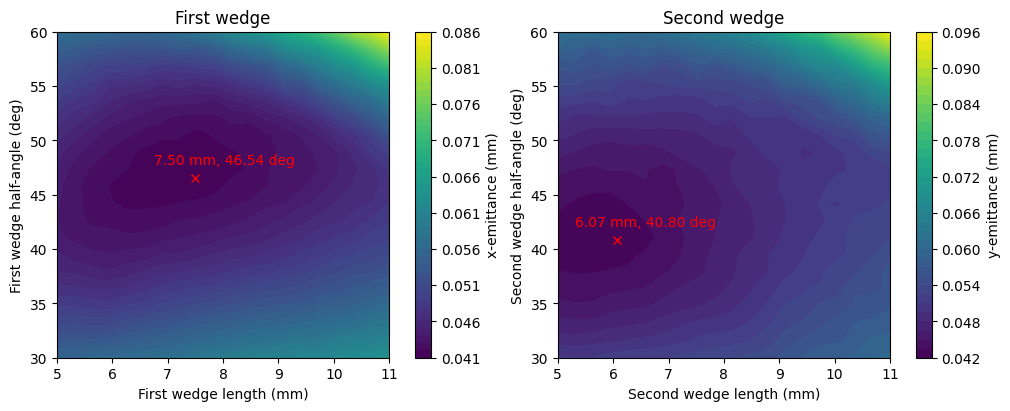

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, layout="constrained")
fig.set_size_inches(10, 4)

# First wedge

with open("results/first_wedge_length_angle.pkl", "rb") as file:
    results = pickle.load(file)

mesh = np.meshgrid(lengths, angles)
meshz = qmap_to_meshgrid(mesh, calc_quantity(lambda df: emittances(cut_outliers(df))[0], results))
meshx, meshy = mesh

cax = ax1.contourf(meshx, meshy, meshz, levels=50)
ax1.set_xlabel("First wedge length (mm)")
ax1.set_ylabel("First wedge half-angle (deg)")
ax1.set_title("First wedge")
plt.colorbar(cax, ax=ax1).set_label("x-emittance (mm)")

ax1.plot(w1_length, w1_angle, 'rx')
ax1.annotate(f"{w1_length:.2f} mm, {w1_angle:.2f} deg", (w1_length, w1_angle), c="red", xytext = (-30, 10), textcoords="offset points")

# Second wedge

with open("results/second_wedge_length_angle.pkl", "rb") as file:
    results = pickle.load(file)

mesh = np.meshgrid(lengths, angles)
meshz = qmap_to_meshgrid(mesh, calc_quantity(lambda df: emittances(cut_outliers(df))[1], results))
meshx, meshy = mesh

cax = ax2.contourf(meshx, meshy, meshz, levels=50)
ax2.set_xlabel("Second wedge length (mm)")
ax2.set_ylabel("Second wedge half-angle (deg)")
ax2.set_title("Second wedge")
plt.colorbar(cax, ax=ax2).set_label("y-emittance (mm)")

ax2.plot(w2_length, w2_angle, 'rx')
ax2.annotate(f"{w2_length:.2f} mm, {w2_angle:.2f} deg", (w2_length, w2_angle), c="red", xytext = (-30, 10), textcoords="offset points")

## Frequency and gradient (regenerated)

In [152]:
rf_freqs = np.linspace(0.01, 0.03, 15)
rf_grads = np.linspace(1,8,15)

In [148]:
def fun(rf_grad, rf_freq):
    return recenter_t(run_g4beam(no_transverse, "G4_RFCavity.g4bl", RF_length=rf_length, frfcool=rf_freq, ficool=rf_phase, Vrfcool=rf_grad))

results = run_scan(fun, (rf_grads, rf_freqs), "results/rf_grad_freq_new.pkl")

100%|██████████████████████████████████████████████████████████████████████████████| 225/225 [1:21:09<00:00, 21.64s/it]


Text(-30, 10, '5.14 MV/m, 25.0 MHz')

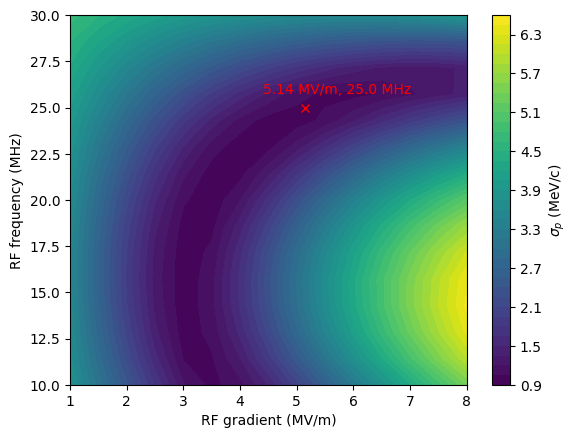

In [155]:
with open("results/rf_grad_freq_new.pkl", "rb") as file:
    results = pickle.load(file)
mesh = np.meshgrid(rf_grads, rf_freqs)
meshz = qmap_to_meshgrid(mesh, calc_quantity(lambda df: np.std(cut_pz(df)["Pz"]), results))
meshx, meshy = mesh

meshy = 1000 * meshy # Scale to MHz

fig, ax = plt.subplots()
cax = ax.contourf(meshx, meshy, meshz, levels=50)
ax.set_xlabel("RF gradient (MV/m)")
ax.set_ylabel("RF frequency (MHz)")
plt.colorbar(cax).set_label(r"$\sigma_p$ (MeV/c)")

ax.plot(rf_grad, rf_freq*1000, 'rx')
ax.annotate(f"{rf_grad:.2f} MV/m, {rf_freq*1000:.1f} MHz", (rf_grad, rf_freq*1000), c="red", xytext = (-30, 10), textcoords="offset points")

## Cavity length and gradient (regenerated)

In [149]:
rf_lengths = np.linspace(2000, 6000, 15)
rf_grads = np.linspace(1,8,15)

In [150]:
def fun(rf_grad, rf_length):
    return recenter_t(run_g4beam(no_transverse, "G4_RFCavity.g4bl", RF_length=rf_length, frfcool=rf_freq, ficool=rf_phase, Vrfcool=rf_grad))

results = run_scan(fun, (rf_grads, rf_lengths), "results/rf_grad_length_new.pkl")

100%|██████████████████████████████████████████████████████████████████████████████| 225/225 [1:04:07<00:00, 17.10s/it]


Text(-30, 10, '5.14 MV/m, 5.59 m')

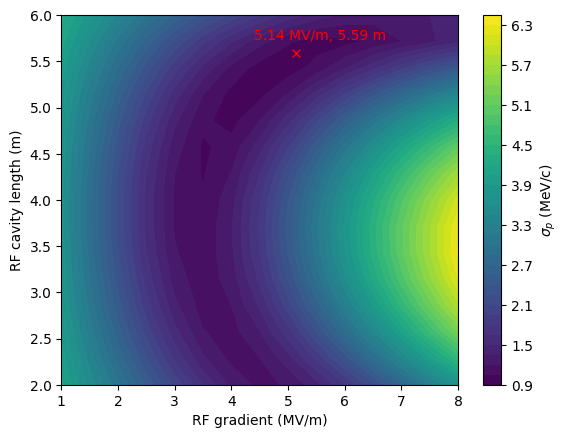

In [163]:
with open("results/rf_grad_length_new.pkl", "rb") as file:
    results = pickle.load(file)
mesh = np.meshgrid(rf_grads, rf_lengths)
meshz = qmap_to_meshgrid(mesh, calc_quantity(lambda df: np.std(cut_pz(df)["Pz"]), results))
meshx, meshy = mesh

meshy /= 1000 #  mm -> m

fig, ax = plt.subplots()
cax = ax.contourf(meshx, meshy, meshz, levels=50)
ax.set_xlabel("RF gradient (MV/m)")
ax.set_ylabel("RF cavity length (m)")
plt.colorbar(cax).set_label(r"$\sigma_p$ (MeV/c)")

ax.plot(rf_grad, rf_length/1000, 'rx')
ax.annotate(f"{rf_grad:.2f} MV/m, {rf_length/1000:.2f} m", (rf_grad, rf_length/1000), c="red", xytext = (-30, 10), textcoords="offset points")

# Scan of optimal, pz_std

In [124]:
t_emit = 0.110  # mm
momentum = 100  # MeV/c
beta = 0.03    # m
alpha = 1     # dimensionless
l_emit = 1      # mm
pz_stds = np.linspace(0.8, 1.1, 6)
vd_dist = 24    # mm

In [107]:
# Meta-function (containing optimization)
def metafun(pz_std):
    pre_w1 = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit)
    
    def func(x):
        length, angle = x
        return emittances(cut_outliers(run_distribution(pre_w1, length, angle, vd_dist, axis=0)))[0]

    return scipy.optimize.minimize(func, [7.5, 45], method="Nelder-Mead", bounds=((1, 10), (30, 70)), options=dict(fatol=2e-4))

run_scan(metafun, (pz_stds,), filename="results/optimal_scan.pkl", trials=5)

100%|███████████████████████████████████████████████████████████████████████████████| 30/30 [5:11:31<00:00, 623.05s/it]


[(0.8,
         message: Optimization terminated successfully.
         success: True
          status: 0
             fun: 0.031168722970684147
               x: [ 6.475e+00  5.079e+01]
             nit: 36
            nfev: 78
   final_simplex: (array([[ 6.475e+00,  5.079e+01],
                         [ 6.475e+00,  5.079e+01],
                         [ 6.475e+00,  5.079e+01]]), array([ 3.117e-02,  3.117e-02,  3.117e-02]))),
 (0.8600000000000001,
         message: Optimization terminated successfully.
         success: True
          status: 0
             fun: 0.031267138258345435
               x: [ 6.249e+00  5.188e+01]
             nit: 37
            nfev: 85
   final_simplex: (array([[ 6.249e+00,  5.188e+01],
                         [ 6.249e+00,  5.188e+01],
                         [ 6.249e+00,  5.188e+01]]), array([ 3.127e-02,  3.127e-02,  3.127e-02]))),
 (0.92,
         message: Optimization terminated successfully.
         success: True
          status: 0
             f

Text(0, 0.5, 'optimal half-angle (deg)')

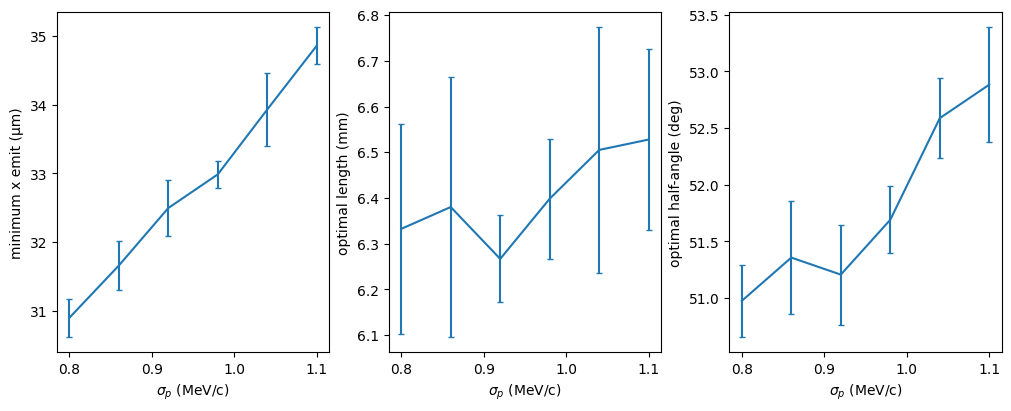

In [129]:
with open("results/optimal_scan.pkl", "rb") as file:
    results = pickle.load(file)

def optim_fun(optim_result):
    return optim_result.fun*1000 # mm -> μm

def optim_x1(optim_result):
    return optim_result.x[0]

def optim_x2(optim_result):
    return optim_result.x[1]


fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, layout="constrained")
fig.set_size_inches(10, 4)
ax1.errorbar(*qmap_to_arrays(pz_stds, calc_quantity(optim_fun, results)), capsize=2)
ax1.set_xlabel(r"$\sigma_p$ (MeV/c)")
ax1.set_ylabel(r"minimum x emit (μm)")

ax2.errorbar(*qmap_to_arrays(pz_stds, calc_quantity(optim_x1, results)), capsize=2)
ax2.set_xlabel(r"$\sigma_p$ (MeV/c)")
ax2.set_ylabel("optimal length (mm)")

ax3.errorbar(*qmap_to_arrays(pz_stds, calc_quantity(optim_x2, results)), capsize=2)
ax3.set_xlabel(r"$\sigma_p$ (MeV/c)")
ax3.set_ylabel("optimal half-angle (deg)")

In [99]:
calc_quantity(optim_fun, results)

{(0.8,): (0.03203172777361045, 0.00015658898234534674),
 (0.9,): (0.0331049797952, 0.00016108196351709628),
 (1.0,): (0.03450948901081038, 0.00046026497448378847),
 (1.1,): (0.036204002800201536, 0.0004105872173761963)}

In [100]:
1e-5

1e-05

In [105]:
calc_quantity(optim_fun, results)[(0.8,)][1] / 1e-4

1.5658898234534673

# Scan of optimal, t_emit

In [131]:
t_emits = np.linspace(0.1, 0.15, 6)
momentum = 100  # MeV/c
beta = 0.03    # m
alpha = 1     # dimensionless
l_emit = 1      # mm
pz_std = 0.8
vd_dist = 24    # mm

In [49]:
# Meta-function (containing optimization)
def metafun(t_emit):
    pre_w1 = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit)
    
    def func(x):
        length, angle = x
        return emittances(cut_outliers(run_distribution(pre_w1, length, angle, vd_dist, axis=0)))[0]

    return scipy.optimize.minimize(func, [7.5, 45], method="Nelder-Mead", bounds=((1, 10), (30, 70)), options=dict(fatol=2e-4))

run_scan(metafun, (t_emits,), filename="results/optimal_scan_2.pkl", trials=5)

100%|███████████████████████████████████████████████████████████████████████████████| 30/30 [4:16:12<00:00, 512.43s/it]


[(0.1,
         message: Optimization terminated successfully.
         success: True
          status: 0
             fun: 0.028845170363004734
               x: [ 6.262e+00  5.259e+01]
             nit: 34
            nfev: 81
   final_simplex: (array([[ 6.262e+00,  5.259e+01],
                         [ 6.262e+00,  5.259e+01],
                         [ 6.262e+00,  5.259e+01]]), array([ 2.885e-02,  2.885e-02,  2.885e-02]))),
 (0.11,
         message: Optimization terminated successfully.
         success: True
          status: 0
             fun: 0.030433729258790614
               x: [ 5.971e+00  5.129e+01]
             nit: 36
            nfev: 89
   final_simplex: (array([[ 5.971e+00,  5.129e+01],
                         [ 5.971e+00,  5.129e+01],
                         [ 5.971e+00,  5.129e+01]]), array([ 3.043e-02,  3.043e-02,  3.044e-02]))),
 (0.12,
         message: Optimization terminated successfully.
         success: True
          status: 0
             fun: 0.03340578

Text(0, 0.5, 'optimal half-angle (deg)')

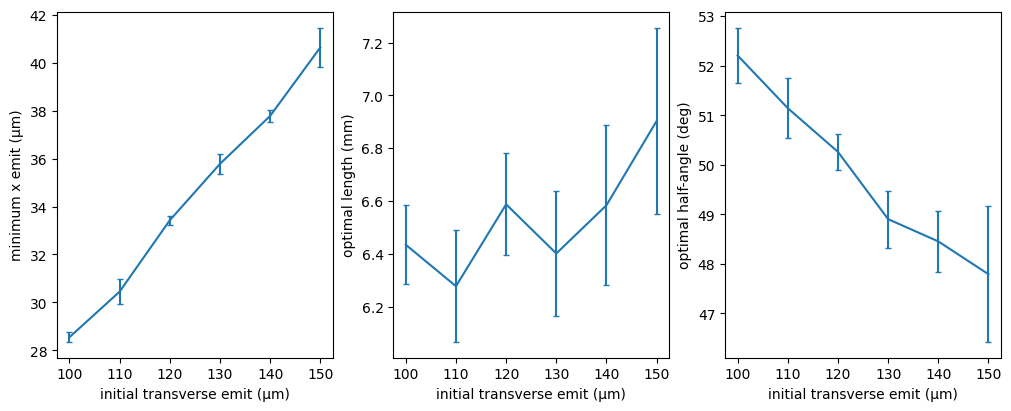

In [134]:
with open("results/optimal_scan_2.pkl", "rb") as file:
    results = pickle.load(file)

results = [(x*1000, y) for x, y in results]

def optim_fun(optim_result):
    return optim_result.fun*1000 # mm --> μm

def optim_x1(optim_result):
    return optim_result.x[0]

def optim_x2(optim_result):
    return optim_result.x[1]


# fig, ax = plt.subplots()
# ax.errorbar(*qmap_to_arrays(t_emits, calc_quantity(optim_fun, results)), capsize=2)
# ax.set_xlabel(r"initial transverse emit (mm)")
# ax.set_ylabel("minimum x emit (mm)")

# fig, ax = plt.subplots()
# ax.errorbar(*qmap_to_arrays(t_emits, calc_quantity(optim_x1, results)), capsize=2)
# ax.set_xlabel(r"initial transverse emit (mm)")
# ax.set_ylabel("optimal length (mm)")

# fig, ax = plt.subplots()
# ax.errorbar(*qmap_to_arrays(t_emits, calc_quantity(optim_x2, results)), capsize=2)
# ax.set_xlabel(r"initial transverse emit (mm)")
# ax.set_ylabel("optimal half-angle (deg)")

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, layout="constrained")
fig.set_size_inches(10, 4)
ax1.errorbar(*qmap_to_arrays(t_emits*1000, calc_quantity(optim_fun, results)), capsize=2)
ax1.set_xlabel(r"initial transverse emit (μm)")
ax1.set_ylabel("minimum x emit (μm)")

ax2.errorbar(*qmap_to_arrays(t_emits*1000, calc_quantity(optim_x1, results)), capsize=2)
ax2.set_xlabel(r"initial transverse emit (μm)")
ax2.set_ylabel("optimal length (mm)")

ax3.errorbar(*qmap_to_arrays(t_emits*1000, calc_quantity(optim_x2, results)), capsize=2)
ax3.set_xlabel(r"initial transverse emit (μm)")
ax3.set_ylabel("optimal half-angle (deg)")

# Scan over phase angle

In [5]:
rf_phases = np.linspace(-30, 30, 11)

In [96]:
def fun(rf_phase):
    pre_w1 = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit, N=12000)
    pre_w1["PDGid"] = -13
    post_w1 = run_distribution(pre_w1, w1_length, w1_angle, vd_dist, axis=0)
    post_correct = remove_dispersion(post_w1)
    reverse_transverse = post_correct.copy(deep=True)
    reverse_transverse["Px"] *= -1
    reverse_transverse["Py"] *= -1
    drift_to_start = drift_length-rf_length/2
    post_drift = recenter_t(z_prop(post_correct, drift_to_start))
    no_transverse = remove_transverse(post_drift)
    post_cavity = cut_pz(recenter_t(run_g4beam(no_transverse, "G4_RFCavity.g4bl", RF_length=rf_length, frfcool=rf_freq, ficool=rf_phase, Vrfcool=rf_grad, nparticles=len(no_transverse))), tails=0.15)
    pre_w2 = recombine_transverse(post_cavity, reverse_transverse)
    return pre_w2

results = run_scan(fun, (rf_phases,), "results/rf_phase_new.pkl", trials=12)

100%|██████████████████████████████████████████████████████████████████████████████| 132/132 [1:02:11<00:00, 28.27s/it]


Text(0, 0.5, '$\\sigma_p$ (MeV/c)')

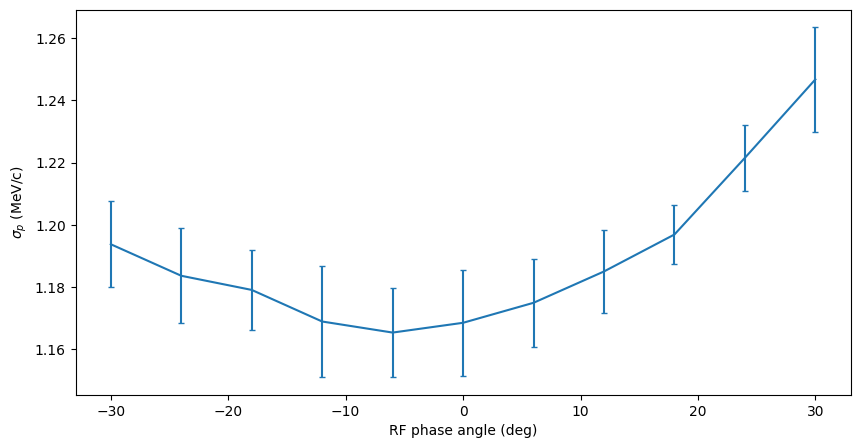

In [7]:
with open("results/rf_phase_new.pkl", "rb") as file:
    results = pickle.load(file)

def q_sigma_p(df):
    return np.std(p_total(cut_pz(df)))

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.errorbar(*qmap_to_arrays(rf_phases, calc_quantity(q_sigma_p, results)), capsize=2)
ax.set_xlabel("RF phase angle (deg)")
ax.set_ylabel(r"$\sigma_p$ (MeV/c)")

# Phase-rotation tableaus

## Drift

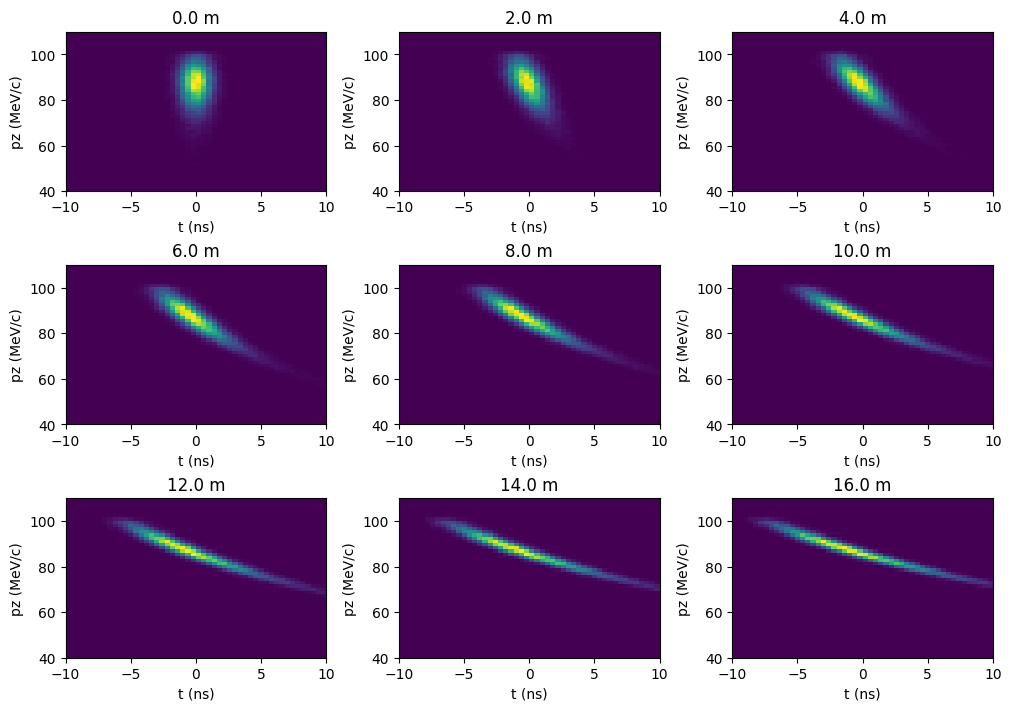

In [104]:
drift_lengths = np.linspace(0, 16, 9)
drift_lengths

fig, axs = plt.subplots(nrows=3, ncols=3, layout="constrained")
axs = axs.flatten()
fig.set_size_inches(10, 7)

for d, ax in zip(drift_lengths, axs):
    post_drift_d = recenter_t(z_prop(post_correct, d*1000))
    ax.hist2d(post_drift_d["t"], post_drift_d["Pz"], bins=50, range=L_RANGES)
    ax.set_xlabel("t (ns)")
    ax.set_ylabel("pz (MeV/c)")
    ax.set_title(f"{d:.1f} m")

## Freq

In [93]:
rf_freq

0.025

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [08:51<00:00, 88.57s/it]


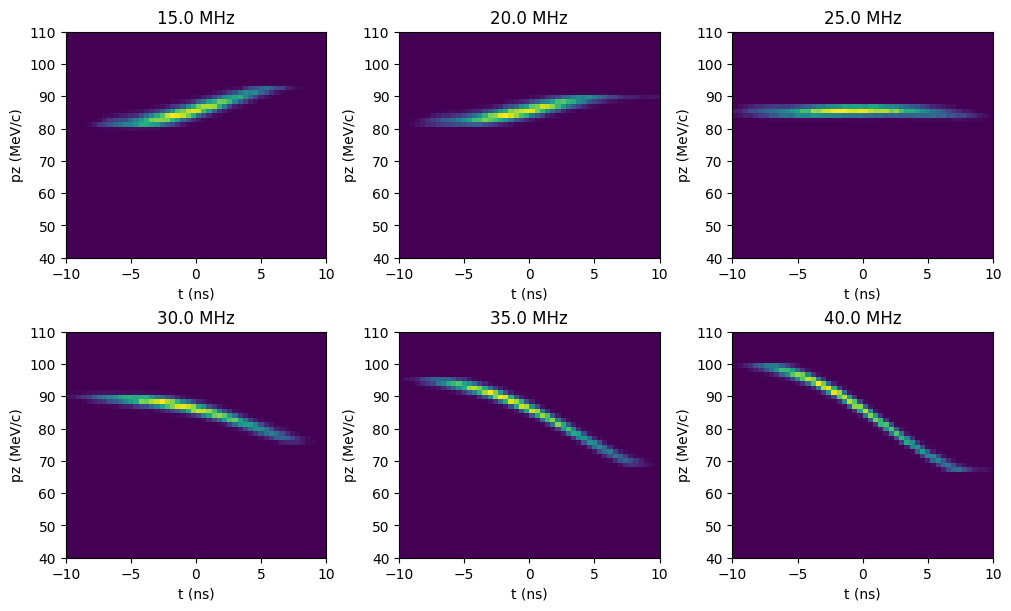

In [111]:
xradius = 0.02
xes = rf_freq + np.linspace(-xradius, xradius, 9) + 0.01

fig, axs = plt.subplots(nrows=2, ncols=3, layout="constrained")
axs = axs.flatten()
fig.set_size_inches(10, 6)

for x, ax in tqdm(list(zip(xes, axs))):
    post_cavity_x = cut_pz(recenter_t(run_g4beam(no_transverse, "G4_RFCavity.g4bl", RF_length=rf_length, frfcool=x, ficool=rf_phase, Vrfcool=rf_grad, nparticles=len(no_transverse))), tails=0.15)
    pre_w2_x = recombine_transverse(post_cavity_x, reverse_transverse)
    
    ax.hist2d(pre_w2_x["t"], pre_w2_x["Pz"], bins=50, range=L_RANGES)
    ax.set_xlabel("t (ns)")
    ax.set_ylabel("pz (MeV/c)")
    ax.set_title(f"{x*1000:.1f} MHz")

## Phase

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [13:20<00:00, 88.97s/it]


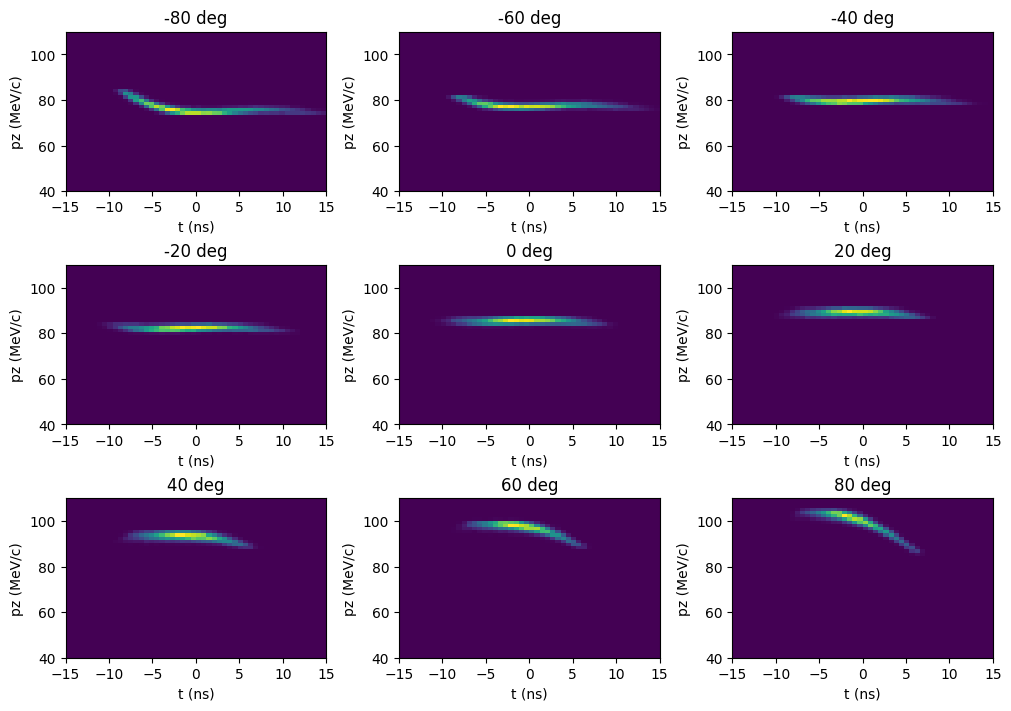

In [107]:
xes = np.linspace(-80, 80, 9)

fig, axs = plt.subplots(nrows=3, ncols=3, layout="constrained")
axs = axs.flatten()
fig.set_size_inches(10, 7)

for x, ax in tqdm(list(zip(xes, axs))):
    post_cavity_x = cut_pz(recenter_t(run_g4beam(no_transverse, "G4_RFCavity.g4bl", RF_length=rf_length, frfcool=rf_freq, ficool=x, Vrfcool=rf_grad, nparticles=len(no_transverse))), tails=0.15)
    pre_w2_x = recombine_transverse(post_cavity_x, reverse_transverse)
    
    ax.hist2d(pre_w2_x["t"], pre_w2_x["Pz"], bins=50, range=L_RANGES)
    ax.set_xlabel("t (ns)")
    ax.set_ylabel("pz (MeV/c)")
    ax.set_title(f"{x:.0f} deg")

## Grad

In [151]:
rf_grad

5.143547111719555

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [13:17<00:00, 88.56s/it]


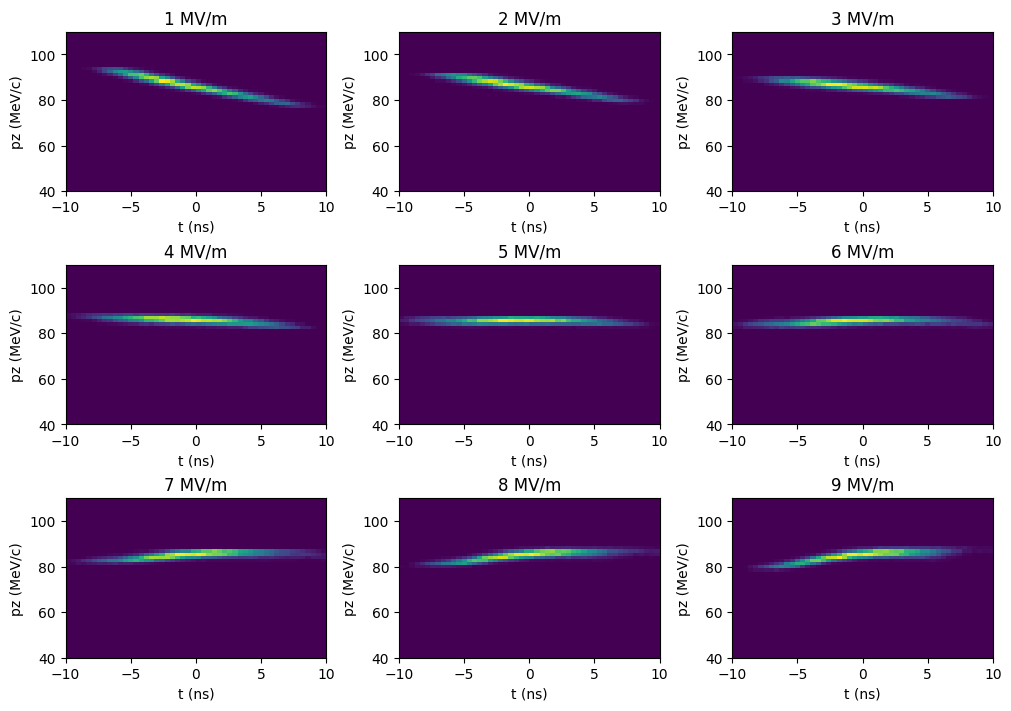

In [110]:
xes = np.linspace(1, 9, 9)

fig, axs = plt.subplots(nrows=3, ncols=3, layout="constrained")
axs = axs.flatten()
fig.set_size_inches(10, 7)

for x, ax in tqdm(list(zip(xes, axs))):
    post_cavity_x = cut_pz(recenter_t(run_g4beam(no_transverse, "G4_RFCavity.g4bl", RF_length=rf_length, frfcool=rf_freq, ficool=rf_phase, Vrfcool=x, nparticles=len(no_transverse))), tails=0.15)
    pre_w2_x = recombine_transverse(post_cavity_x, reverse_transverse)
    
    ax.hist2d(pre_w2_x["t"], pre_w2_x["Pz"], bins=50, range=L_RANGES)
    ax.set_xlabel("t (ns)")
    ax.set_ylabel("pz (MeV/c)")
    ax.set_title(f"{x:.0f} MV/m")

## Length

In [71]:
rf_length

5589.183462571583

In [77]:
L_RANGES

[[-10, 10], [40, 110]]

In [112]:
L_RANGES = [[-15, 15], [40, 110]]

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [14:09<00:00, 94.35s/it]


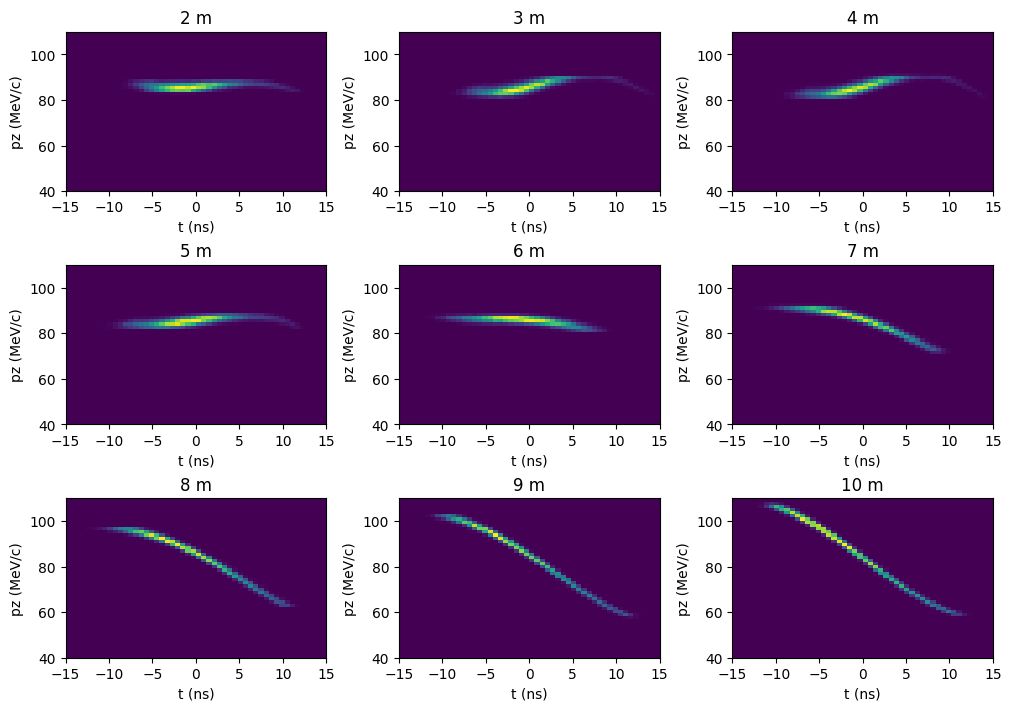

In [113]:
xes = np.linspace(2, 10, 9)

fig, axs = plt.subplots(nrows=3, ncols=3, layout="constrained")
axs = axs.flatten()
fig.set_size_inches(10, 7)

for x, ax in tqdm(list(zip(xes, axs))):
    post_cavity_x = cut_pz(recenter_t(run_g4beam(no_transverse, "G4_RFCavity.g4bl", RF_length=x*1000, frfcool=rf_freq, ficool=rf_phase, Vrfcool=rf_grad, nparticles=len(no_transverse))), tails=0.15)
    pre_w2_x = recombine_transverse(post_cavity_x, reverse_transverse)
    
    ax.hist2d(pre_w2_x["t"], pre_w2_x["Pz"], bins=50, range=L_RANGES)
    ax.set_xlabel("t (ns)")
    ax.set_ylabel("pz (MeV/c)")
    ax.set_title(f"{x:.0f} m")

# VD distance

In [114]:
vd_dists = np.linspace(4, 40, 30)

In [66]:
def fun(vd_dist):
    pre_w1 = gen_distribution((beta, alpha, t_emit, 0, 0), (beta, alpha, t_emit, 0, 0), momentum, pz_std, z_emit=l_emit, N=12000)
    pre_w1["PDGid"] = -13
    return run_distribution(pre_w1, w1_length, w1_angle, vd_dist, axis=0)

results = run_scan(fun, (vd_dists,), "results/vd_dist_new.pkl", trials=12)

100%|████████████████████████████████████████████████████████████████████████████████| 360/360 [35:33<00:00,  5.93s/it]


Text(0, 0.5, 'xemit (μm)')

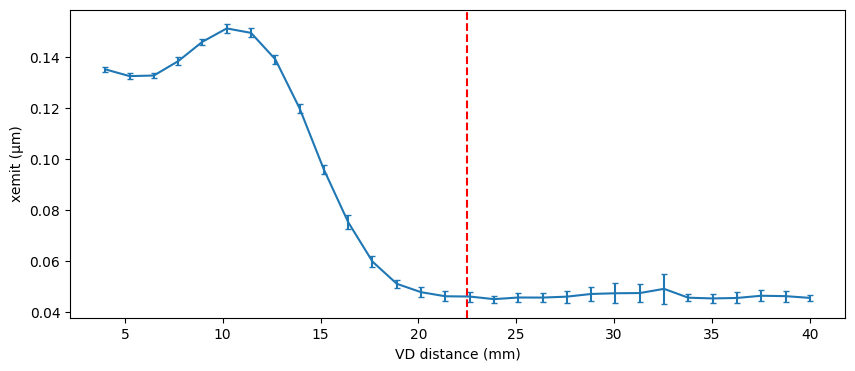

In [116]:
with open("results/vd_dist_new.pkl", "rb") as file:
    results = pickle.load(file)

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)

def xemit(df):
    return emittances(df)[0]

ax.errorbar(*qmap_to_arrays(vd_dists, calc_quantity(xemit, results)), capsize=2)
ax.axvline(7.5*3, linestyle="--", color="r")
ax.set_xlabel("VD distance (mm)")
ax.set_ylabel(r"xemit (μm)")

# Scan of optimal, drift length

In [96]:
drift_lengths = np.linspace(8000, 16000, 5)

In [97]:
# Meta-function (containing optimization)
def metafun(drift_length):
    def func(x):
        rf_length, rf_grad = x
        drift_to_start = drift_length-rf_length/2
        post_drift = recenter_t(z_prop(post_correct, drift_to_start))
        no_transverse = remove_transverse(post_drift)
        post_cavity = run_g4beam(no_transverse, "G4_RFCavity.g4bl", RF_length=rf_length, frfcool=rf_freq, ficool=rf_phase, Vrfcool=rf_grad, nparticles=len(no_transverse))
        pre_w2 = recombine_transverse(post_cavity, reverse_transverse)
        return np.std(p_total(cut_pz(pre_w2)))
    
    # Run optimization
    return minimize(func, [4700, 7], method="Nelder-Mead", bounds=((2000, 6000), (1, 10)), options=dict(fatol=1e-6))

results = run_scan(metafun, (drift_lengths,), filename="results/optimal_scan_3.pkl")
beep()

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

iter value


 20%|████████████████                                                                | 1/5 [49:09<3:16:38, 2949.53s/it]

  72 1.76561e+00
iter value


 40%|███████████████████████████████▏                                              | 2/5 [1:38:14<2:27:20, 2946.69s/it]

  68 1.58837e+00
iter value


 60%|██████████████████████████████████████████████▊                               | 3/5 [2:28:10<1:38:58, 2969.21s/it]

  69 1.45593e+00
iter value


 80%|████████████████████████████████████████████████████████████████                | 4/5 [3:16:33<49:03, 2943.35s/it]

  65 1.36111e+00
iter value


100%|████████████████████████████████████████████████████████████████████████████████| 5/5 [4:28:31<00:00, 3222.33s/it]

  95 1.28813e+00


Text(0, 0.5, 'Optimal RF gradient (MV/m)')

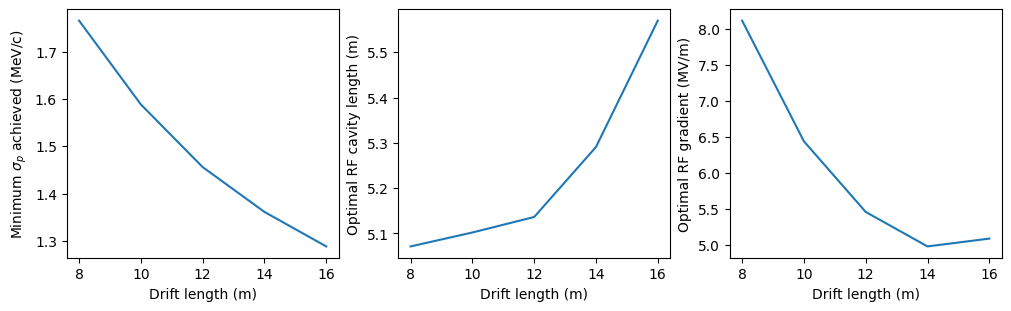

In [123]:
with open("results/optimal_scan_3.pkl", "rb") as file:
    results = pickle.load(file)

results = [(x/1000, y) for x, y in results]

def optim_fun(optim_result):
    return optim_result.fun

def optim_x1(optim_result):
    return optim_result.x[0]/1000 # Scale mm -> m

def optim_x2(optim_result):
    return optim_result.x[1]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, layout="constrained")
fig.set_size_inches(10, 3)
ax1.errorbar(*qmap_to_arrays(drift_lengths/1000, calc_quantity(optim_fun, results)))
ax1.set_xlabel(r"Drift length (m)")
ax1.set_ylabel(r"Minimum $\sigma_p$ achieved (MeV/c)")

ax2.errorbar(*qmap_to_arrays(drift_lengths/1000, calc_quantity(optim_x1, results)))
ax2.set_xlabel(r"Drift length (m)")
ax2.set_ylabel("Optimal RF cavity length (m)")

ax3.errorbar(*qmap_to_arrays(drift_lengths/1000, calc_quantity(optim_x2, results)))
ax3.set_xlabel(r"Drift length (m)")
ax3.set_ylabel("Optimal RF gradient (MV/m)")

In [93]:
def func(x):
    rf_length, rf_grad = x
    drift_to_start = drift_length-rf_length/2
    post_drift = recenter_t(z_prop(post_correct, drift_to_start))
    no_transverse = remove_transverse(post_drift)
    post_cavity = run_g4beam(no_transverse, "G4_RFCavity.g4bl", RF_length=rf_length, frfcool=rf_freq, ficool=rf_phase, Vrfcool=rf_grad, nparticles=len(no_transverse))
    pre_w2 = recombine_transverse(post_cavity, reverse_transverse)
    return np.std(p_total(cut_pz(pre_w2)))

# Run optimization
minimize(func, [4700, 7], method="Nelder-Mead", bounds=((2000, 6000), (1, 10)), options=dict(fatol=1e-6))

iter value


KeyboardInterrupt: 